In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from PIL import Image
from scipy.ndimage import convolve
import cv2

Filtre de Sobel

In [ ]:
image_rgb = np.array(Image.open('imag/NaturalColorImages.jpg'))
channels = ['Red', 'Green', 'Blue']
gradients = {}
Gx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
Gy = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
for idx, channel in enumerate(channels):
    gray_img = image_rgb[:, :, idx].astype(np.float64)
    h, w = gray_img.shape
    gradient_magnitude = np.zeros((h, w), dtype=np.float64)
    gradient_direction = np.zeros((h, w), dtype=np.float64)
    for i in range(1, h - 1):
        for j in range(1, w - 1):
            horizontalGrad = np.sum(Gx * gray_img[i-1:i+2, j-1:j+2])
            verticalGrad = np.sum(Gy * gray_img[i-1:i+2, j-1:j+2])
            gradient_magnitude[i, j] = np.sqrt(horizontalGrad**2 + verticalGrad**2)
            gradient_direction[i, j] = np.arctan2(verticalGrad, horizontalGrad)
    gradients[channel] = (gradient_magnitude, gradient_direction)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(gradient_magnitude, cmap='gray')
    plt.title(f"{channel} Channel - Gradient Magnitude")
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(gradient_direction, cmap='hsv')
    plt.colorbar(label='Direction (radians)')
    plt.title(f"{channel} Channel - Gradient Direction")
    plt.axis('off')
    plt.show()
    print(f"{channel} Channel - Gradient Direction:\n", gradient_direction)
    print(f"{channel} Channel - Gradient Magnitude:\n", gradient_magnitude)
amplitude = np.sqrt(Gx**2 + Gy**2)
print("Amplitude of the Sobel filters:\n", amplitude)


Filtre de Prewitt

In [ ]:
image_rgb = np.array(Image.open('imag/NaturalColorImages.jpg'))
channels = ['Red', 'Green', 'Blue']
gradients = {}
Gx = np.array([[-1, 0, 1], [-1, 0, +1], [-1, 0, 1]])
Gy = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
for idx, channel in enumerate(channels):
    gray_img = image_rgb[:, :, idx].astype(np.float64)
    h, w = gray_img.shape
    gradient_magnitude = np.zeros((h, w), dtype=np.float64)
    gradient_direction = np.zeros((h, w), dtype=np.float64)
    for i in range(1, h - 1):
        for j in range(1, w - 1):
            horizontalGrad = np.sum(Gx * gray_img[i-1:i+2, j-1:j+2])
            verticalGrad = np.sum(Gy * gray_img[i-1:i+2, j-1:j+2])
            gradient_magnitude[i, j] = np.sqrt(horizontalGrad**2 + verticalGrad**2)
            gradient_direction[i, j] = np.arctan2(verticalGrad, horizontalGrad)
    gradients[channel] = (gradient_magnitude, gradient_direction)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(gradient_magnitude, cmap='gray')
    plt.title(f"{channel} Channel - Gradient Magnitude")
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(gradient_direction, cmap='hsv')
    plt.colorbar(label='Direction (radians)')
    plt.title(f"{channel} Channel - Gradient Direction")
    plt.axis('off')
    plt.show()
    print(f"{channel} Channel - Gradient Direction:\n", gradient_direction)
    print(f"{channel} Channel - Gradient Magnitude:\n", gradient_magnitude)
amplitude = np.sqrt(Gx**2 + Gy**2)
print("Amplitude of the Sobel filters:\n", amplitude)


Laplacien

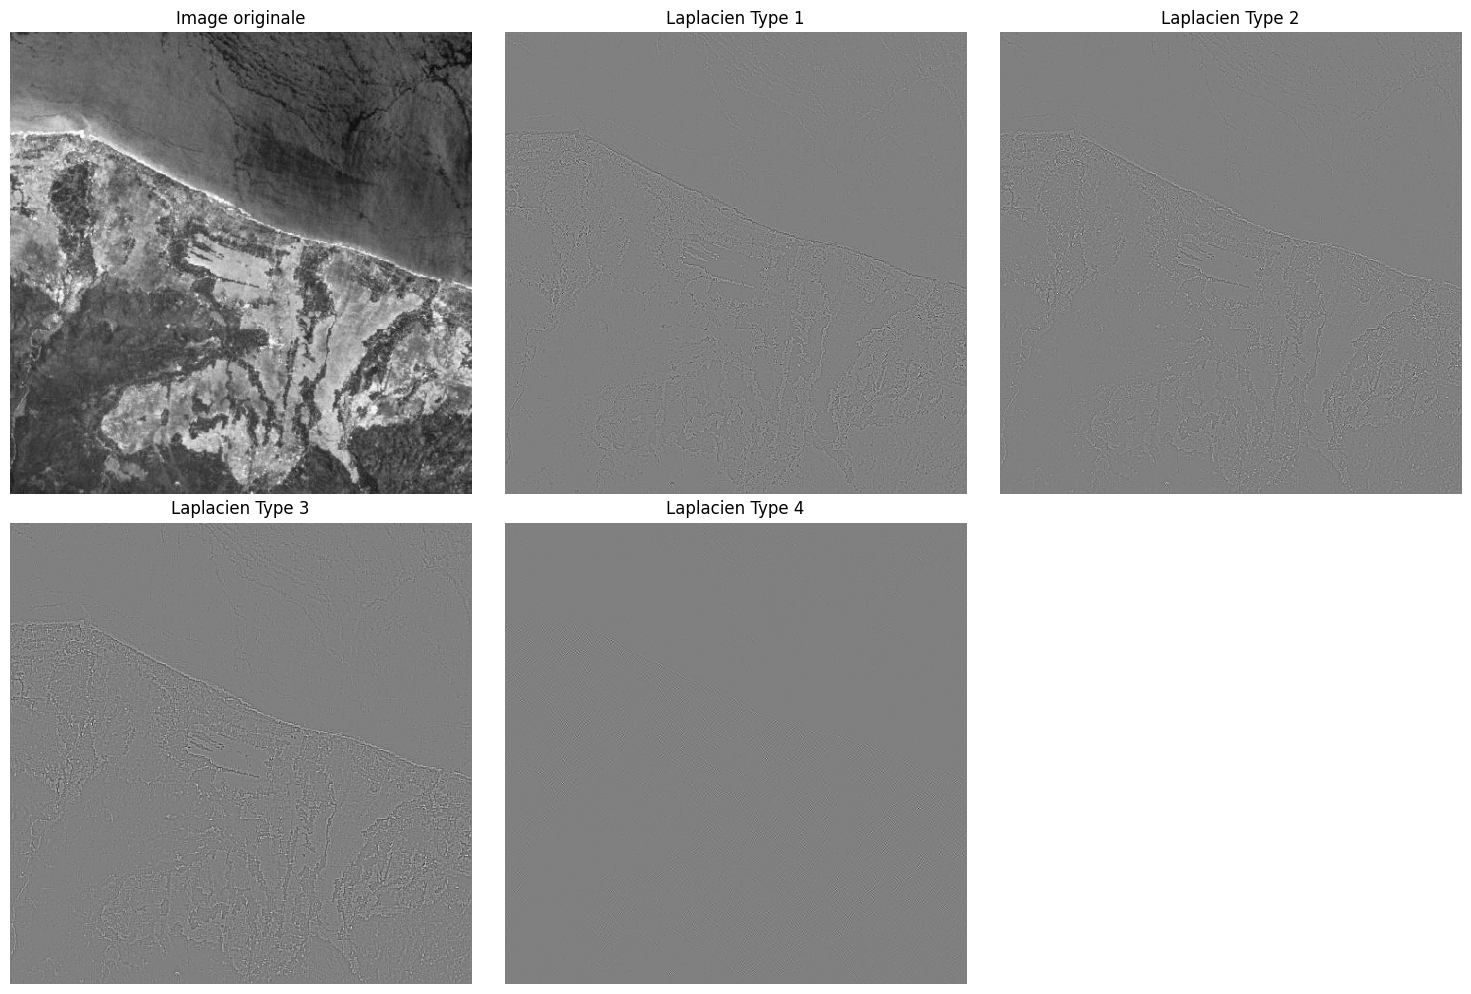

In [2]:
def apply_laplacian(image, kernel, threshold=10):
    h, w = image.shape
    filtered_img = np.zeros_like(image)
    for i in range(1, h-1):
        for j in range(1, w-1):
            region = image[i-1:i+2, j-1:j+2]
            filtered_value = np.sum(region * kernel)
            filtered_img[i, j] = filtered_value
    filtered_img = filtered_img / np.max(np.abs(filtered_img))
    filtered_img = np.where(np.abs(filtered_img) > threshold/255, filtered_img, 0)
    return filtered_img

image_path = 'imag/NaturalColorImages.jpg'
gray_img = np.array(Image.open(image_path).convert('L')).astype(np.float64)
laplacian_masks = {
    'Type 1': np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]]),
    'Type 2': np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]]),
    'Type 3': np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]),
    'Type 4': np.array([[1, -2, 1], [-2, 4, -2], [1, -2, 1]])
}
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
plt.imshow(gray_img, cmap='gray')
plt.title('Image originale')
plt.axis('off')
for idx, (name, mask) in enumerate(laplacian_masks.items(), start=2):
    filtered = apply_laplacian(gray_img, mask)
    plt.subplot(2, 3, idx)
    plt.imshow(filtered, cmap='gray', vmin=-1, vmax=1)
    plt.title(f'Laplacien {name}')
    plt.axis('off')
plt.tight_layout()
plt.show()

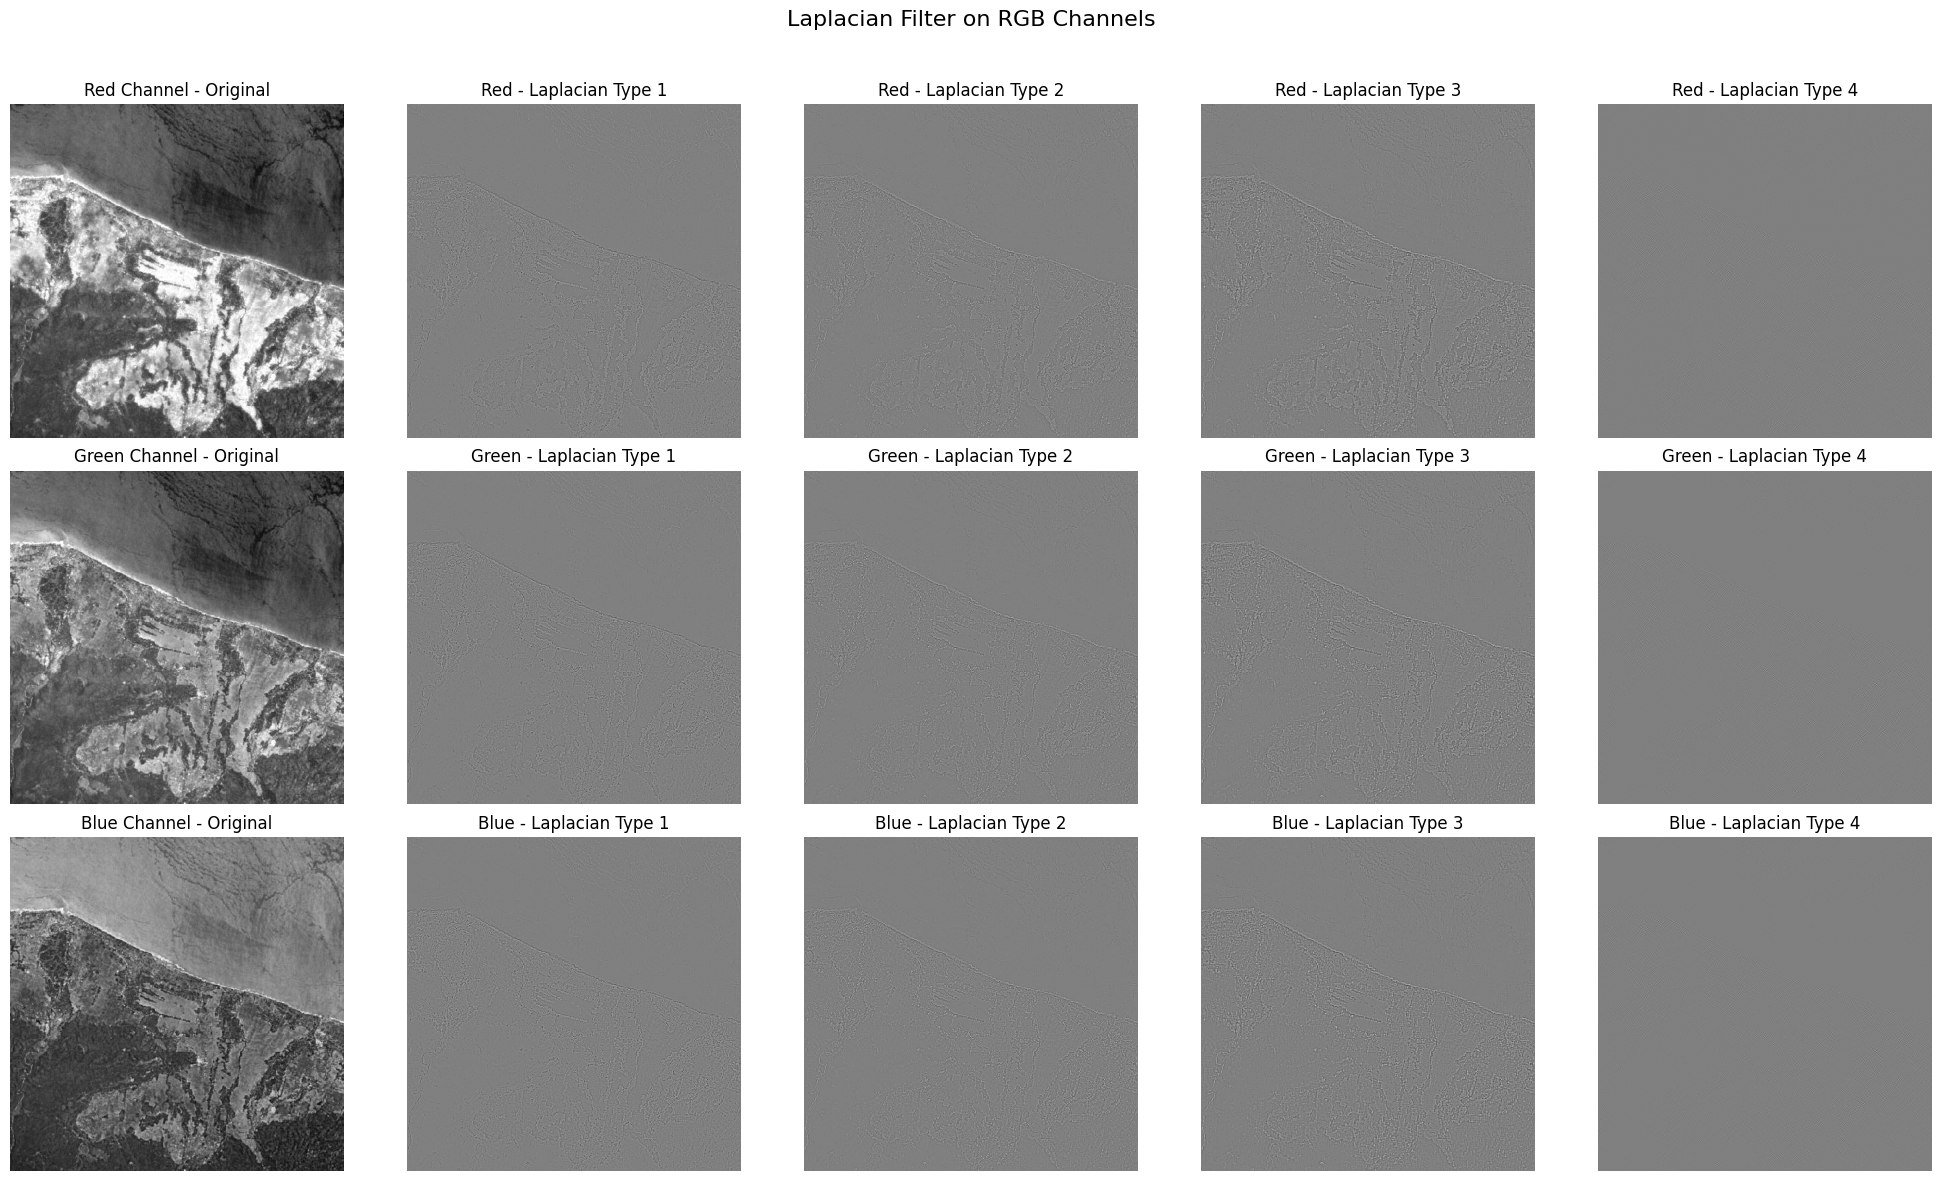

In [6]:
def apply_laplacian(image, kernel, threshold=10):
    h, w = image.shape
    filtered_img = np.zeros_like(image)
    for i in range(1, h-1):
        for j in range(1, w-1):
            region = image[i-1:i+2, j-1:j+2]
            filtered_value = np.sum(region * kernel)
            filtered_img[i, j] = filtered_value
    filtered_img = filtered_img / np.max(np.abs(filtered_img))
    filtered_img = np.where(np.abs(filtered_img) > threshold / 255, filtered_img, 0)
    return filtered_img

image_path = 'imag/NaturalColorImages.jpg'
image_rgb = np.array(Image.open(image_path))

laplacian_masks = {
    'Type 1': np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]]),
    'Type 2': np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]]),
    'Type 3': np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]),
    'Type 4': np.array([[1, -2, 1], [-2, 4, -2], [1, -2, 1]])
}

# Process each channel with each Laplacian mask
channels = ['Red', 'Green', 'Blue']
plt.figure(figsize=(20, 12))
plt.suptitle("Laplacian Filter on RGB Channels", fontsize=16)

for ch_idx, channel in enumerate(channels):
    # Extract single channel
    gray_img = image_rgb[:, :, ch_idx].astype(np.float64)
    
    # Display original channel
    plt.subplot(3, len(laplacian_masks) + 1, ch_idx * (len(laplacian_masks) + 1) + 1)
    plt.imshow(gray_img, cmap='gray')
    plt.title(f"{channel} Channel - Original")
    plt.axis('off')
    
    # Apply each Laplacian filter to the channel
    for idx, (name, mask) in enumerate(laplacian_masks.items()):
        filtered = apply_laplacian(gray_img, mask)
        plt.subplot(3, len(laplacian_masks) + 1, ch_idx * (len(laplacian_masks) + 1) + idx + 2)
        plt.imshow(filtered, cmap='gray', vmin=-1, vmax=1)
        plt.title(f"{channel} - Laplacian {name}")
        plt.axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


LOG

In [ ]:
def gaussian_kernel(size, sigma):
    kernel = np.fromfunction(
        lambda x, y: (1 / (2 * np.pi * sigma**2)) * np.exp(
            -((x - (size - 1) / 2)**2 + (y - (size - 1) / 2)**2) / (2 * sigma**2)
        ),
        (size, size)
    )
    return kernel / np.sum(kernel)
def log_filter(image, size, sigma):
    kernel_gaussian = gaussian_kernel(size, sigma)
    kernel_log = (np.fromfunction(
        lambda x, y: ((x - (size - 1) / 2)**2 + (y - (size - 1) / 2)**2 - 2 * sigma**2) / (sigma**4),
        (size, size)
    )) * kernel_gaussian
    kernel_log -= kernel_log.mean()
    h, w = image.shape
    kh, kw = kernel_log.shape
    pad_h, pad_w = kh // 2, kw // 2
    log_image = np.zeros_like(image)
    for i in range(pad_h, h - pad_h):
        for j in range(pad_w, w - pad_w):
            region = image[i - pad_h:i + pad_h + 1, j - pad_w:j + pad_w + 1]
            log_image[i, j] = np.sum(region * kernel_log)
    log_image = 255 * (log_image - np.min(log_image)) / (np.max(log_image) - np.min(log_image))    
    return log_image.astype(np.uint8)
image_path = 'imag/NaturalColorImages.jpg'
image = np.array(Image.open(image_path).convert('L')).astype(np.float64)
size = 5   
sigma = 1.0 
log_edges = log_filter(image, size, sigma)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Image originale')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(log_edges, cmap='gray')
plt.title('Détection des bords LoG')
plt.axis('off')

plt.tight_layout()
plt.show()
